# Python for telecom customer churn warning

## Business understanding

Lost customers refer to those who have used a product or service before but no longer use it due to various reasons such as losing interest in the product.
Telephone service companies, internet service providers, insurance companies, and alert monitoring service companies often use customer churn analysis and customer churn rate as one of their key business indicators (KPIs) because the cost of retaining an old customer is much lower than acquiring a new one. Companies from these industries typically have customer service departments that attempt to retain lost customers, as long-term customers retained may be more valuable to the company than newly acquired customers.
Companies usually differentiate between proactive and non proactive churn. Active churn refers to a customer's decision to switch to another company or service provider, while non active churn is due to customer relocation, death, or other circumstances. In most application analyses, the reasons for involuntary turnover are excluded from the analysis model. Analysts tend to focus on proactive churn, as it is usually caused by customer related behavioral factors that can be controlled by the company, such as how to handle bills or provide after-sales service.
Predictive analysis uses a customer churn prediction model to predict customer churn by assessing the risk propensity of customer churn. Due to the generation of a loss probability ranking list by these models, they can effectively implement customer retention marketing plans for potential high probability loss customers.

## Data Understanding

This analysis data comes from IBM Sample Data Sets, which collects consumption data from a certain telecommunications company over a period of time. There are a total of 7043 customer data, each containing 21 fields, including 1 customer ID field, 19 input fields, and 1 target field - Hurn (Yes represents churn, No represents no churn). The input fields mainly include the following three dimensional indicators: user profile indicator, consumer product indicator, and consumer information indicator. The specific description of the fields is as follows:

字段|字段翻译|Role| Measurement Type|Number of Different Values
---|:--:|---:|--:|--:
customerID |客户ID|ID|No type|7043
gender |性别|input|classification|2
SeniorCitizen |老年人|输入|分类|2
Partner |是否有配偶|输入|分类|2
Dependents |是否经济独立|输入|分类|2
tenure |在网时长|输入|Value|73
PhoneService |是否开通电话服务业务|输入|分类|2
MultipleLines |是否开通多线业务|输入|分类|3
InternetService |是否开通互联网服务|输入|分类|3
OnlineSecurity |是否开通网络安全服务|输入|分类|3
OnlineBackup |是否开通在线备份业务|输入|分类|3
DeviceProtection|是否开通了设备保护业务|输入|分类|3
TechSupport |是否开通了技术支持服务|输入|分类|3
StreamingTV |是否开通网络电视|输入|分类|3
StreamingMovies |是否开通网络电影|输入|分类|3
Contract |签订合同方式|输入|分类|3
PaperlessBilling |是否开通电子账单|输入|分类|2
PaymentMethod |付款方式|输入|分类|4
MonthlyCharges |月费用|输入|数值|1585
TotalCharges |总费用|输入|数值|6531
Churn |是否流失|target|分类|2

## Data Reading and Overview

In [1]:
# data processing
import numpy as np 
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py 
import plotly.graph_objs as go 
import plotly.figure_factory as ff 

# pretreatment
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
# , scorer
from sklearn.metrics import recall_score, precision_score, f1_score, cohen_kappa_score

pd.set_option('display.max_columns', None) 

In [15]:
# read in data
df = pd.read_csv('./Telco-Customer-Churn.csv')
df.head()  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Preliminary data cleaning

Firstly, carry out preliminary data cleaning work, including handling error values and outliers, and divide them into category and numerical field types. The cleaning section includes:
1. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: Error value handling
2. TotalCharges: handling outliers
3. Tenure: Custom Splitting
4. Define category and numerical fields

In [17]:
# Error value handling
repl_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in repl_columns:
    df[i]  = df[i].replace({'No internet service' : 'No'}) 

# Replacing Values: SeniorCitizen
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1: "Yes", 0: "No"}) 

# Replacing Values: TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan) 

# TotalCharges. Empty value: Small data volume, directly delete
df = df.dropna(subset=['TotalCharges']) 
df.reset_index(drop=True, inplace=True)  # Reset Index

# shifting clause
df['TotalCharges'] = df['TotalCharges'].astype('float')

# convert tenure
def transform_tenure(x):
    if x <= 12:
        return 'Tenure_1'
    elif x <= 24:
        return 'Tenure_2'
    elif x <= 36:
        return 'Tenure_3'
    elif x <= 48:
        return 'Tenure_4'
    elif x <= 60:
        return 'Tenure_5'
    else:
        return 'Tenure_over_5' 

df['tenure_group'] = df.tenure.apply(transform_tenure)

# Numeric and categorical fields
Id_col = ['customerID']
target_col = ['Churn']

cat_cols = df.nunique()[df.nunique() < 10].index.tolist() 
num_cols = [i for i in df.columns if i not in cat_cols + Id_col] 

print('类别型字段：\n', cat_cols) #Category type fields:
print('-' * 30) 
print('数值型字段：\n', num_cols) #Numeric field:

类别型字段：
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_group']
------------------------------
数值型字段：
 ['tenure', 'MonthlyCharges', 'TotalCharges']


## Exploratory analysis

Summarize and sort out indicators, including user profile indicators, consumer product indicators, and consumer information indicators. Explore the key factors that affect user churn.

### Descriptive analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


The monthly consumption amount evaluated by the user is 64 yuan, with an average total cost of 2283 yuan.

### Churn distribution of target variable

In [10]:
df['Churn'].value_counts() 

No     5163
Yes    1869
Name: Churn, dtype: int64

In [16]:
trace0 = go.Pie(labels=df['Churn'].value_counts().index, 
                values=df['Churn'].value_counts().values,
                hole=.5,
                rotation=90,
                marker=dict(colors=['rgb(154,203,228)', 'rgb(191,76,81)'], 
                            line=dict(color='white', width=1.3))
               )
data = [trace0] 
layout = go.Layout(title='目标变量Churn分布') #Target variable Chun distribution

fig = go.Figure(data=data, layout=layout)
py.offline.plot(fig, filename='./html/整体流失情况分布.html') #Overall loss distribution..html

'./html/整体流失情况分布.html'

After preliminary cleaning, the dataset size was 7032 records, of which 1869 were lost customers, accounting for 26.6%, and 73.4% were not lost customers.

### Gender and whether loss occurs

In [6]:
def plot_bar(input_col: str, target_col: str, title_name: str):
    cross_table = round(pd.crosstab(df[input_col], df[target_col], normalize='index')*100, 2)

    # index
    index_0 = cross_table.columns.tolist()[0] 
    index_1 = cross_table.columns.tolist()[1] 

    # Draw trajectory
    trace0 = go.Bar(x=cross_table.index.tolist(), 
                    y=cross_table[index_0].values.tolist(), 
                    name=index_0,
                    marker=dict(color='rgb(154,203,228)')
                   ) 
    trace1 = go.Bar(x=cross_table.index.tolist(), 
                    y=cross_table[index_1].values.tolist(), 
                    name=index_1,
                    marker=dict(color='rgb(191,76,81)')
                   ) 

    data = [trace0, trace1] 
    # layout
    layout = go.Layout(title=title_name, bargap=0.4, barmode='stack')
    
    # canvas
    fig = go.Figure(data=data, layout=layout)
    # draw
    py.offline.plot(fig, filename=f'./html/{title_name}.html') 

In [18]:
pd.crosstab(df['gender'], df['Churn']) 

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


In [19]:
plot_bar(input_col='gender', target_col='Churn', title_name='性别与是否流失的关系') #The relationship between gender and turnover

Conclusion:
There is no significant difference in the proportion of customer churn between males and females.

### Elderly users and whether they are lost

In [20]:
pd.crosstab(df['SeniorCitizen'], df['Churn']) 

Churn,No,Yes
SeniorCitizen,,
No,4497,1393
Yes,666,476


In [21]:
plot_bar(input_col='SeniorCitizen', target_col='Churn', title_name='老年用户与是否流失的关系') #The relationship between elderly users and turnover

Conclusion:
The proportion of elderly users losing is higher, at 41.68%, which is nearly twice that of non elderly users. This part of the reason needs further exploration.

### Economic independence and loss

In [22]:
pd.crosstab(df['Dependents'], df['Churn']) 

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1773,326


In [23]:
plot_bar(input_col='Dependents', target_col='Churn', title_name='是否经济独立与是否流失的关系') #The relationship between economic independence and turnover

Conclusion:
From the perspective of economic independence, the churn rate of economically dependent users is much higher than that of economically independent users.

### Whether there is a spouse and whether there is loss

In [24]:
pd.crosstab(df['Partner'], df['Churn'])  

Churn,No,Yes
Partner,,
No,2439,1200
Yes,2724,669


In [25]:
plot_bar(input_col='Partner', target_col='Churn', title_name='是否有配偶与是否流失的关系') #The relationship between whether there is a spouse and whether there is loss

Conclusion:
From the perspective of marriage situation, data shows that the proportion of unmarried people losing is 13% higher than that of married people.

### Online duration and whether it is lost

In [26]:
pd.crosstab(df['tenure_group'], df['Churn']) 

Churn,No,Yes
tenure_group,,
Tenure_1,1138,1037
Tenure_2,730,294
Tenure_3,652,180
Tenure_4,617,145
Tenure_5,712,120
Tenure_over_5,1314,93


In [27]:
plot_bar(input_col='tenure_group', target_col='Churn', title_name='在网时长与是否流失的关系') #The relationship between online duration and loss

Conclusion:
1. The longer the user's online time, the higher their loyalty and the lower their probability of loss;
3. The turnover rate of new users within one year is significantly higher than the overall turnover rate, at 47.68%.

### Whether to activate telephone service business and whether it is lost

In [28]:
pd.crosstab(df['PhoneService'], df['Churn']) 

Churn,No,Yes
PhoneService,,
No,510,170
Yes,4653,1699


In [29]:
plot_bar(input_col='PhoneService', target_col='Churn', title_name='是否开通电话服务业务与是否流失关系') #The relationship between whether to activate telephone service business and whether it is lost  

Conclusion:
In mobile services, the churn rate of users who subscribe to telephone service services is basically the same as that of unsubscribed users, with fewer users who do not subscribe to telephone service services.

### Whether to open multi line services and whether to lose

In [30]:
pd.crosstab(df['MultipleLines'], df['Churn']) 

Churn,No,Yes
MultipleLines,,
No,2536,849
No phone service,510,170
Yes,2117,850


In [31]:
plot_bar(input_col='MultipleLines', target_col='Churn', title_name='是否开通多线业务与是否流失关系') 
#title_name = The relationship between whether to open multi line business and whether to lose business

Conclusion:
In mobile services, the churn rate of users who subscribe to MultipleLines is slightly higher than those who do not subscribe.

### Internet services and whether they are lost

In [32]:
pd.crosstab(df['InternetService'], df['Churn']) 

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [33]:
plot_bar(input_col='InternetService', target_col='Churn', title_name='是否开通互联网服务与是否流失关系') 
#The relationship between whether to activate internet services and whether to lose them

Conclusion:
In network services, the probability of user churn is significantly higher for users who have opened internet services than for users who have not opened them. Among them, the proportion of churn for users who subscribe to fiber optical fiber networks is as high as 41.89%, which is higher than for users who subscribe to DSL digital networks.

### Technical services and whether they are lost

In [34]:
plot_bar(input_col='OnlineSecurity', target_col='Churn', title_name='是否开通网络安全服务与是否流失关系') #The relationship between whether to activate network security services and whether to lose them
plot_bar(input_col='OnlineBackup', target_col='Churn', title_name='是否开通在线备份业务与是否流失关系') #Whether to activate online backup service and whether there is a loss relationship
plot_bar(input_col='DeviceProtection', target_col='Churn', title_name='是否开通了设备保护业务与是否流失关系') #Whether the device protection service has been activated and whether it has been lost
plot_bar(input_col='TechSupport', target_col='Churn', title_name='是否开通了技术支持服务与是否流失关系') #Whether technical support services have been activated and whether there is a loss relationship

Conclusion:
The user churn rate of subscribed technical services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) is lower than that of unsubscribed services, while the churn rate of unsubscribed services is higher.

### Entertainment services and whether they are lost

In [35]:
plot_bar(input_col='StreamingTV', target_col='Churn', title_name='是否开通网络电视与是否流失关系') #The relationship between whether to open online TV and whether to lose
plot_bar(input_col='StreamingMovies', target_col='Churn', title_name='是否开通网络电影与是否流失关系') #The relationship between whether to activate online movies and whether to lose them

Conclusion:
On entertainment services (StreamingTV, StreamingMovies), the churn rate of subscriptions is higher than that of unsubscribed ones.

### Contract signing method and whether it is lost

In [36]:
pd.crosstab(df['Contract'], df['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [37]:
plot_bar(input_col='Contract', target_col='Churn', title_name='签订合同方式与是否流失关系') #The relationship between the signing method of the contract and whether it has been lost

Conclusion:
In terms of contract duration, the longer the signing time, the higher the user loyalty and the lower the churn rate. Among them, the user who chooses monthly signing has the highest churn rate, reaching 42.71%. The proportion of users who choose to sign for two years is 23.96% overall, with a loss probability of only 2.85%.

### Whether to activate electronic bills and whether they are lost

In [38]:
pd.crosstab(df['PaperlessBilling'], df['Churn']) 

Churn,No,Yes
PaperlessBilling,,
No,2395,469
Yes,2768,1400


In [39]:
plot_bar(input_col='PaperlessBilling', target_col='Churn', title_name='是否开通电子账单与是否流失关系') #Whether to activate electronic bills and whether there is a loss relationship 

Conclusion:
The churn rate of users who open electronic bills is significantly higher than that of users who choose paper bills.

### Payment method and whether it is lost

In [40]:
pd.crosstab(df['PaymentMethod'], df['Churn']) 

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [41]:
plot_bar(input_col='PaymentMethod', target_col='Churn', title_name='付款方式与是否流失关系') #The relationship between payment method and loss

Conclusion:
In terms of payment methods, users who choose electronic check payment have the highest churn rate, reaching 45.29%. The churn rate of the other three payment methods is not significantly different.

### Monthly expenses and whether there is loss

In [42]:
def plot_histogram(input_col: str, title_name: str):
    churn_num = df[df['Churn'] == 'Yes'][input_col]
    not_churn_num = df[df['Churn'] == 'No'][input_col] 
    
    # Graph trajectory
    trace0 = go.Histogram(x=churn_num, 
                          bingroup=25,
                          histnorm='percent',
                          name='流失客户', #Lost customers
                          marker=dict(color='rgb(191,76,81)')
                         )
    trace1 = go.Histogram(x=not_churn_num, 
                          bingroup=25,
                          histnorm='percent',
                          name='未流失客户', #No lost customers
                          marker=dict(color='rgb(154,203,228)')
                         )

    data = [trace0, trace1]
    layout = go.Layout(title=title_name)

    fig = go.Figure(data=data, layout=layout)
    py.offline.plot(fig, filename=f'./html/{title_name}.html') 

In [43]:
plot_histogram(input_col='MonthlyCharges', title_name='月费用与是否流失关系') #Relationship between monthly expenses and turnover

Conclusion:
Overall, with the increase of monthly expenses, the proportion of lost users shows a high to low trend, with users spending 80-100 yuan per month being relatively high.

### Total cost and loss or not

In [44]:
plot_histogram(input_col='TotalCharges', title_name='总费用与是否流失关系') #Relationship between total expenses and turnover

Conclusion:
As the total cost increases, the probability of loss tends to decrease, with losses ranging from 0 to 200 yuan accounting for a relatively high proportion, reaching 44%.

### Numeric attribute correlation

C:\Users\82327\AppData\Local\Temp\ipykernel_49204\1772201555.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



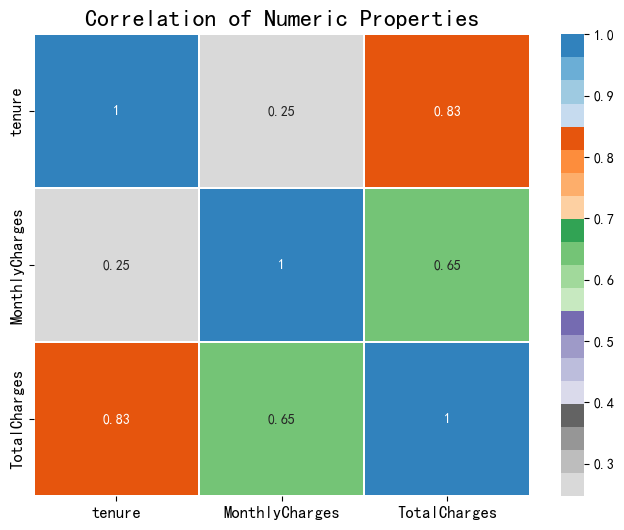

In [19]:
#Exploring the correlation of numerical variables
import matplotlib
# matplotlib.rc("font",family='SimHei')

plt.figure(figsize=(8, 6))  
sns.heatmap(df.corr(), linewidths=0.1, cmap='tab20c_r', annot=True)
plt.title('Correlation of Numeric Properties', fontdict={'fontsize': 'xx-large', 'fontweight':'heavy'}) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show() 

From the correlation matrix graph, it can be seen that the user's transaction period is highly correlated with the total cost. The longer the transaction period, the higher the total cost. There is a significant correlation between monthly consumption and total consumption.

## Pre modeling processing

To meet the modeling needs of Python, the data needs to be processed as follows.
1. For categorical variables, code them as 0 and 1;
2. For multi class variables, perform dummy variable transformation;
3. For numerical variables, some models such as KNN, neural networks, and logistic need to be standardized.

In [21]:
# For binary variables, codes are 0 and 1;
# For multi class variables, perform one_ Hot encoding;
# For numerical variables, some models such as KNN, neural networks, and logistic need to be standardized.
# Modeling data
from sklearn.preprocessing import LabelEncoder
df_model = df
Id_col = ['customerID']
target_col = ['Churn']
# Classification
cat_cols = df_model.nunique()[df_model.nunique() < 10].index.tolist()
# Binary attribute
binary_cols = df_model.nunique()[df_model.nunique() == 2].index.tolist()
# Multi classification attributes
multi_cols = [i for i in cat_cols if i not in binary_cols]
# Numerical type
num_cols = [i for i in df_model.columns if i not in cat_cols + Id_col]
# Classification 2- Label Encoding
le = LabelEncoder()
for i in binary_cols:
    df_model[i] = le.fit_transform(df_model[i])
# Multi classification - dummy variable conversion
df_model = pd.get_dummies(data=df_model, columns=multi_cols)
df_model.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_1,tenure_group_Tenure_2,tenure_group_Tenure_3,tenure_group_Tenure_4,tenure_group_Tenure_5,tenure_group_Tenure_over_5
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0


## Feature Selection

In [24]:
# Use statistical verification methods for feature selection.
#from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df_model.copy().drop(['customerID','Churn'], axis=1)
y = df_model[target_col]
fs = SelectKBest(score_func=f_classif, k=20)
X_train_fs = fs.fit_transform(X,y)
X_train_fs.shape
def SelectName(feature_data, model):
    
    scores = model.scores_
    indices = np.argsort(scores)[::-1]
    return list(feature_data.columns.values[indices[0:model.k]])
###Output Selection Variable Name
print(SelectName(X,fs))

fea_name = [i for i in X.columns if i in SelectName(X,fs)]
X_train = pd.DataFrame(X_train_fs,columns = fea_name)
X_train.head()

['Contract_Month-to-month', 'tenure', 'tenure_group_Tenure_1', 'InternetService_Fiber optic', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_No', 'tenure_group_Tenure_over_5', 'TotalCharges', 'MonthlyCharges', 'PaperlessBilling', 'Contract_One year', 'OnlineSecurity', 'TechSupport', 'Dependents', 'SeniorCitizen', 'Partner', 'PaymentMethod_Credit card (automatic)', 'InternetService_DSL', 'PaymentMethod_Bank transfer (automatic)']


D:\software\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,tenure_group_Tenure_1,tenure_group_Tenure_over_5
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,29.85,29.85,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,34.0,1.0,0.0,0.0,56.95,1889.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,2.0,1.0,0.0,1.0,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,45.0,1.0,1.0,0.0,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0,0.0,1.0,70.70,151.65,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


After feature filtering, 20 fields were left.

## Model establishment and evaluation

First, divide the training and testing sets

In [25]:
# redraw
X = df_model.drop(['customerID', 'Churn'], axis=1) 
y = df_model['Churn']  

# Stratified Sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

#Correction index
for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0]) 

(5625, 34) (1407, 34) (5625,) (1407,)


In [26]:
# Save standardized training and testing data
st = StandardScaler()
num_scaled_train = pd.DataFrame(st.fit_transform(X_train[num_cols]), columns=num_cols)
num_scaled_test = pd.DataFrame(st.transform(X_test[num_cols]), columns=num_cols) 

X_train_sclaed = pd.concat([X_train.drop(num_cols, axis=1), num_scaled_train], axis=1)
X_test_sclaed = pd.concat([X_test.drop(num_cols, axis=1), num_scaled_test], axis=1) 

Then establish a series of benchmark models and compare their effectiveness.

In [27]:
def model_report(model, X_train, X_test, y_train, y_test, name) :
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test) 
    
    # Evaluation indicators
    accuracy = accuracy_score(y_test, y_pred)
    recallscore = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred) 
    kappa_metric = cohen_kappa_score(y_test, y_pred)
    
    # Save Data
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

# instance model
logit = LogisticRegression()

knn = KNeighborsClassifier(n_neighbors=5) 

svc_lin  = SVC(kernel='linear', random_state=0) 

svc_rbf  = SVC(kernel='rbf', random_state=0) 

mlp_model = MLPClassifier(hidden_layer_sizes=(8,), alpha=0.05, max_iter=50000, 
                          activation='logistic', random_state=0)

gnb = GaussianNB()

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)  

rfc = RandomForestClassifier(n_estimators=100, random_state=0) 

lgbm_c = LGBMClassifier(boosting_type='gbdt', n_estimators=100, random_state=0) 

xgc = XGBClassifier(n_estimators=100, eta=0.02, max_depth=15, random_state=0, learning_rate=0.001)

# Call
model1 = model_report(logit, X_train_sclaed, X_test_sclaed, y_train, y_test,
                      "Logistic Regression")
model2 = model_report(knn, X_train_sclaed, X_test_sclaed, y_train, y_test,
                      "KNN Classifier")
model3 = model_report(svc_lin, X_train_sclaed, X_test_sclaed, y_train, y_test,
                      "SVM Classifier Linear")
model4 = model_report(svc_rbf, X_train_sclaed, X_test_sclaed, y_train, y_test,
                      "SVM Classifier RBF")
model5 = model_report(mlp_model, X_train_sclaed, X_test_sclaed, y_train, y_test,
                      "MLP Classifier")
model6 = model_report(gnb, X_train, X_test, y_train, y_test,
                      "Naive Bayes")
model7 = model_report(decision_tree, X_train, X_test, y_train, y_test,
                      "Decision Tree")
model8 = model_report(rfc, X_train, X_test, y_train, y_test,
                      "Random Forest Classifier")
model9 = model_report(lgbm_c, X_train, X_test, y_train, y_test,
                      "LGBM Classifier") 
model10 = model_report(xgc, X_train, X_test, y_train, y_test,
                      "XGBoost Classifier")

# Splice Table
model_performances = pd.concat([model1, model2, model3,
                                model4, model5, model6,
                                model7, model8, model9, model10], axis=0).reset_index()

model_performances = model_performances.drop(columns="index",axis =1)

table  = ff.create_table(np.round(model_performances, 4))

py.offline.iplot(table) 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


Assuming we focus on the roc indicator, Naive Bayes performs the best in terms of model performance.
We can also further optimize the model, such as adjusting the decision tree parameters.

In [28]:
parameters = {'splitter': ('best','random'),
              'criterion': ("gini","entropy"),
              "max_depth": [*range(3, 20)],
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, scoring='f1', cv=10)
GS.fit(X_train, y_train)

print(GS.best_params_) 

print(GS.best_score_) 

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
0.6009036817198528


In [29]:
clf = GS.best_estimator_

test_pred = clf.predict(X_test)
print('测试集：\n', classification_report(y_test, test_pred)) #Test Set:

测试集：
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.60      0.56      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Draw this tree.

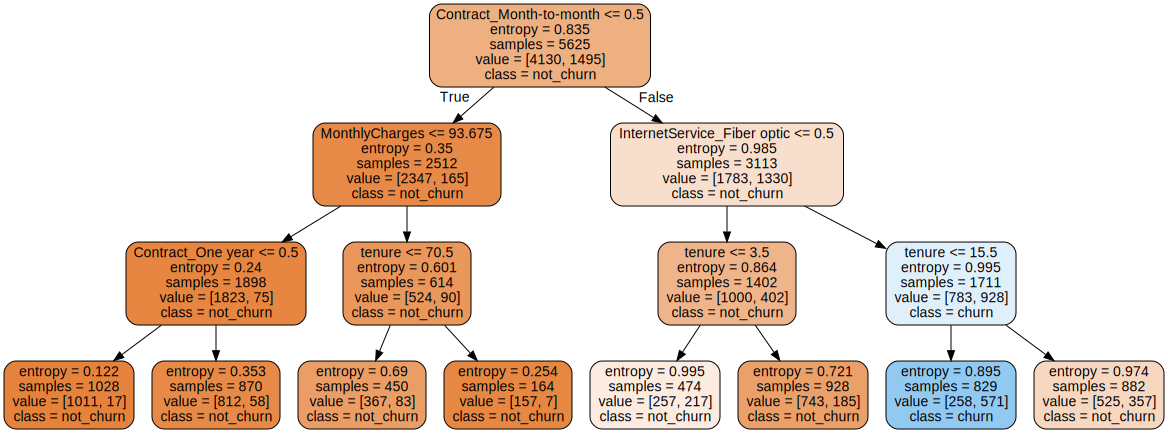

In [30]:
#Draw this tree
import graphviz
# from pydotplus.graphviz import graph_from_dot_data
# from sklearn.tree import export_graphviz

part_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
part_DT.fit(X_train, y_train)

dot_data = tree.export_graphviz(decision_tree=part_DT, max_depth=3,
                                 out_file=None, 
#                                  feature_names=X_train.columns,
                                 feature_names = X_train.columns,
                                 class_names=['not_churn', 'churn'], 
                                 filled=True,
                                 rounded=True
                                )
graph = graphviz.Source(dot_data)
graph
# graph = graph_from_dot_data(dot_data) # Create graph from dot data

# graph.write_png('./决策树.png') # Write graphto PNG image #decision tree

Output decision tree attribute importance ranking:

In [31]:
imp = pd.DataFrame(zip(X_train.columns, clf.feature_importances_))
imp.columns = ['feature', 'importances']
imp = imp.sort_values('importances', ascending=False)
imp = imp[imp['importances'] != 0]

table  = ff.create_table(np.round(imp, 4))
py.offline.iplot(table)  

Subsequent optimization directions:
1. Data: When classification technology is applied to a dataset with a more uniform distribution of target categories, the classifier it establishes usually has better classification performance. To address the imbalanced distribution of data on the target field, oversampling and undersampling can be used to address the issue of category imbalance;
2. Attributes: Further attribute screening methods and attribute combinations;
3. Algorithm: parameter tuning; Adjust the prediction threshold to increase prediction performance.